In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import sys
from scipy.fftpack import fft, fftfreq
import scipy as sp
from scipy import signal

import umap
from sklearn.preprocessing import RobustScaler, StandardScaler

from matplotlib.ticker import MaxNLocator
from scatseisnet import ScatteringNetwork

#from aquarel import Theme


/home/dokhtdor/.conda/envs/test_imag/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:


from sklearn.decomposition import FastICA, PCA, KernelPCA, SparsePCA, IncrementalPCA
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.cluster import KMeans

from fastcluster import linkage
from scipy.cluster.hierarchy import fcluster
import umap
# explained_variance_score
from sklearn.metrics import explained_variance_score
from matplotlib import colors
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

from sklearn.metrics import explained_variance_score

import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

from scipy.signal import butter, sosfiltfilt


In [3]:
freqmax = 8
sr = 40

reduce_type = np.mean

name_fig = 'CLUSTERING_FIGURES'

name = f"{name_fig}"

savepath = f"/bettik/dokhtdor/projects/mirko_volcano_simulations/figures/{name}/"

os.makedirs(savepath, exist_ok=True)




In [4]:


FILEPATH = "/bettik/dokhtdor/projects/mirko_volcano_simulations/dataset/"

vs_hr = np.load(FILEPATH+'vs_map_2400x1300.npy')
vs_hr = vs_hr/1000

vs = np.load(FILEPATH+'vs_array.npy') 
vs = vs/1000

data_records_vs = []
for i in range(1, 6):
    data_read = np.hstack([np.load(FILEPATH+f"vert{i}/z_r_s{i}.npy")[:, np.newaxis,:], np.load(FILEPATH+f"horiz{i}/z_r_s{i}_hor.npy")[:, np.newaxis,:]] )    
    data_records_vs.append(data_read)
data_records_vs = np.array(data_records_vs) 

sos = butter(10, freqmax, 'lp', fs=40, output='sos')
data_records_vs = sosfiltfilt(sos, data_records_vs[:,:,:], axis=-1)
data_records_vs = np.concatenate(data_records_vs, axis = 1)
#data_records_vs = data_records_vs[:, :, ::2]

data_records_hs = []
for i in range(1, 6):    
    data_read = np.hstack([np.load(FILEPATH+f"vert{i}/x_r_s{i}.npy")[:, np.newaxis,:], np.load(FILEPATH+f"horiz{i}/x_r_s{i}_hor.npy")[:, np.newaxis,:]] )    
    data_records_hs.append(data_read)
data_records_hs = np.array(data_records_hs)


sos = butter(10, freqmax, 'lp', fs=40, output='sos')
data_records_hs = sosfiltfilt(sos, data_records_hs[:,:,:], axis=-1)
data_records_hs = np.concatenate(data_records_hs, axis = 1)
#data_records_hs = data_records_hs[:, :, ::2]


In [5]:
sr = 40

x_dist = (10000+100*np.arange(65))/1000
y_dist = (2500+100*np.arange(120))/1000

y_dist.min(), y_dist.max()

time_ = np.arange(0, data_records_hs.shape[-1], 1) / sr
indxvs = np.arange(120*65).reshape(120, 65)

indx = [15, 35, 55, 75, 95]

x_dist_hr = np.arange(10, 16.5, .005)
y_dist_hr = np.arange(2.5, 14.5, .005)



In [6]:
import matplotlib.font_manager



In [7]:



segment_duration_seconds = data_records_hs.shape[-1]/sr

sampling_rate_hertz = sr

samples_per_segment = int(segment_duration_seconds * sampling_rate_hertz)


bank_keyword_arguments = (
        {"octaves": 3, "resolution": 8, "quality": 2, "normalize_wavelet": 'l2'},
        {"octaves": 4, "resolution": 5, "quality": 3, "normalize_wavelet": 'l2'},
            
    )


bank_keyword_arguments = (
        {"octaves": 3, "resolution": 10, "quality": 2, "normalize_wavelet": 'l2'},
        {"octaves": 4, "resolution": 2, "quality": 2, "normalize_wavelet": 'l2'},
        )

bank_keyword_arguments = (
        {"octaves": 4, "resolution": 5, "quality": 2, "normalize_wavelet": 'l2'},
        {"octaves": 5, "resolution": 2, "quality": 3, "normalize_wavelet": 'l2'},
        )


bank_keyword_arguments = (
        {"octaves": 4, "resolution": 5, "quality": 2, "normalize_wavelet": 'l2'},
        {"octaves": 6, "resolution": 2, "quality": 3, "normalize_wavelet": 'l2'},
        )

network = ScatteringNetwork(
    *bank_keyword_arguments,
    bins=samples_per_segment,
    sampling_rate=sampling_rate_hertz,
    )

print(network)



ScatteringNetwork(bins=1500, sampling_rate=40, len=2)
ComplexMorletBank(bins=1500, octaves=4, resolution=5, quality=2, sampling_rate=40, len=20)
ComplexMorletBank(bins=1500, octaves=6, resolution=2, quality=3, sampling_rate=40, len=12)


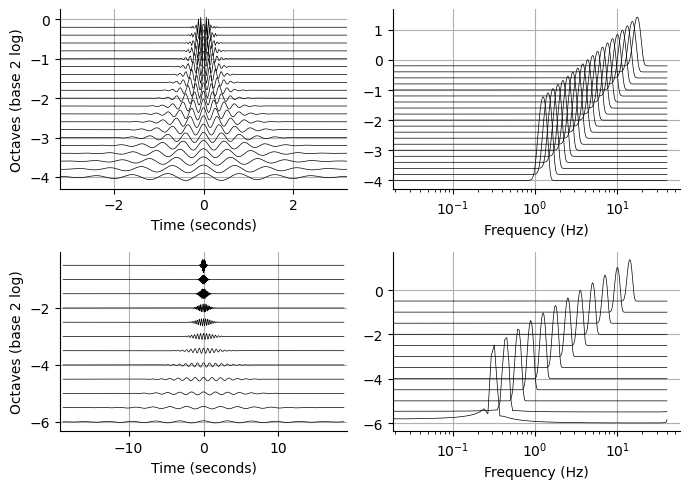

In [8]:

# Loop over network layers
#plt.figure(figsize=(10,5))

#cc = low_pass_filter(2000, sigma = 0.2)
fig, ax = plt.subplots(2, 2, figsize=(7,5),  )



for i, bank in enumerate(network.banks):

    # Create axes (left for temporal, right for spectral domain)
    
    ii = 0
    # Show each wavelet
    for wavelet, spectrum, ratio in zip(
        bank.wavelets[:], bank.spectra[:], bank.ratios[:]
    ):

        # Time domain
        ax[i,0].plot(bank.times, wavelet.real + ratio, c= 'k', lw = 0.5)
        #ax[i,0].plot(bank.times, wavelet.imag + ratio, c='r', lw = 0.5)

        # Spectral domain (log of amplitude)
        ax[i,1].plot(bank.frequencies, np.log(np.abs(spectrum) + 1) + ratio, c = 'k', lw = 0.5)
        #ax[i,2].plot(bank.frequencies, np.log(np.abs(spectrum*cc[1000:]) + 1) + ratio, c = 'b', lw = 0.5)
        
    #ax[0,1].plot(bank.frequencies, np.log(np.abs(cc[1000:]) + 1) -0.25, c = 'r', lw = 0.5)

    # Limit view to three times the temporal width of largest wavelet
    width_max = 2 * bank.widths.max()

    # Labels
    
    
    ax[i,0].set_ylabel("Octaves (base 2 log)")
    ax[i,0].set_xlabel("Time (seconds)")
    ax[i,0].set_xlim(-width_max, width_max)
    ax[i,0].grid()
    ax[i,1].set_xscale("log")
    ax[i,1].set_xlabel("Frequency (Hz)")
    ax[i,1].grid()

    #ax[i, 0].set_xlim(0.1, 50)
    #  
    #ax[i,2].set_xscale("log")
    #ax[i,2].set_xlabel("Frequency (Hz)")
    #ax[i,2].grid()
    #ax[i, 1].set_xlim(0.1, 50)
    
    ii = ii+1

for axn in ax.flat:
    axn.spines['top'].set_visible(False)
    axn.spines['right'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    #ax.spines['left'].set_visible(False)
# ... plotting code here



fig.tight_layout()
#fig.savefig(savepath + f'filterbank.pdf', transparent=True, dpi = 300)




In [9]:
segments = [data_records_hs[i,:,:] for i in indxvs[indx, 30]]

sc1 = network.transform(segments,  reduce_type= None )




In [10]:
def reader_coeff(path_file, network = network):

    scm_ = np.load(path_file)
    sc = [scm_['order_1'], scm_['order_2']]

    for i in range(len(network.banks[0].centers)):
        n = network.banks[0].centers[i] <= network.banks[1].centers
        sc[1][:,:, i, n] = np.nan
    return sc

sc_med__hs = "/bettik/dokhtdor/projects/mirko_volcano_simulations/coefficients/sc_hs_median_40.npz"
sc_med__vs = "/bettik/dokhtdor/projects/mirko_volcano_simulations/coefficients/sc_vs_median_40.npz"

sc_med__hs = "/bettik/dokhtdor/projects/mirko_volcano_simulations/coefficients/sc_hs_2_median_40.npz"
sc_med__vs = "/bettik/dokhtdor/projects/mirko_volcano_simulations/coefficients/sc_vs_2_median_40.npz"

# sc_med_20_hs = "/bettik/dokhtdor/projects/mirko_volcano_simulations/coefficients/sc_com_hs_average_20.npz"
# sc_med_20_vs = "/bettik/dokhtdor/projects/mirko_volcano_simulations/coefficients/sc_com_vs_average_20.npz"

scattering_coeff_vs = reader_coeff(sc_med__vs, network = network)
scattering_coeff_hs = reader_coeff(sc_med__hs, network = network)


/tmp/ipykernel_94733/3401080330.py:63: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  cb = plt.colorbar(img, ax=ax[i], orientation="horizontal", pad=0.35)
/tmp/ipykernel_94733/3401080330.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


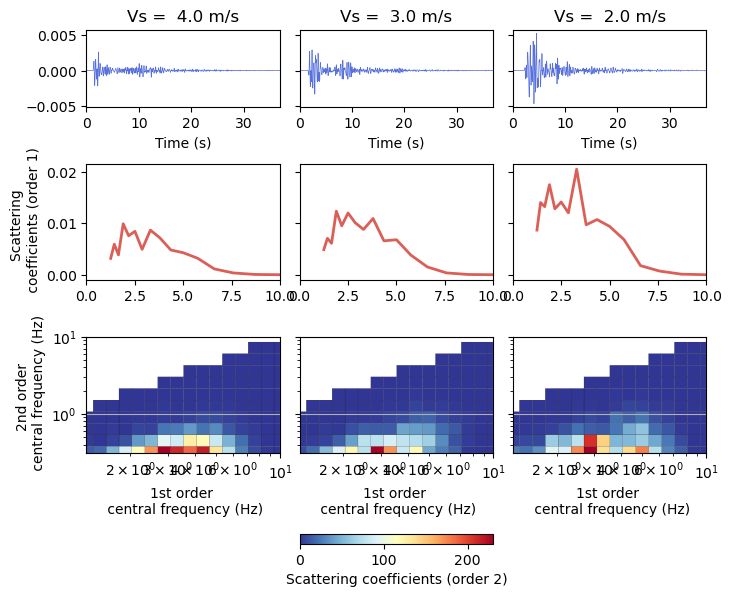

In [11]:

sc = scattering_coeff_vs.copy()


gs = {"hspace": 0.4, "wspace": 0.1, "height_ratios": [1,1.5, 3]}
fig, axs = plt.subplots(
        3, 3, figsize=(8, 7), sharex="row", sharey="row", gridspec_kw=gs
    )


offset_x = 30

trc = [35, 55, 80]

ax = axs[0].reshape(-1)

for i, ind in enumerate(trc):

    ax[i].set_title(f"Vs =  {np.ceil(vs.reshape(-1)[indxvs[ind, offset_x]])} m/s")
    ax[i].plot(time_, data_records_hs[indxvs[ind, offset_x],0,:], lw = 0.5,  c = '#5770db')
    
    ax[i].set_xlabel('Time (s)')
    ax[i].set_xlim(0, 37)

    
ax = axs[1].reshape(-1)


for i, ind in enumerate(trc):
    ss = sc[0][indxvs[ind, offset_x]][0]
    sss = ss #- np.mean(sc[0][:, 0, :], axis = 0)
    sss = abs(sss)
    
    ax[i].plot(network.banks[0].centers, (sss), lw = 2,  c = '#db5f57')
    #ax[i].plot(np.fft.fftfreq(1500, 1/sr)[:750], abs(sp.fft.fft(data[indxvs[ind, offset_x],0,:]))[:750]/100, label = 'FFT', c = '#57db5f', lw = 2, alpha = 0.5)

    #ax[i].set_ylim(0, 0.1)
    #ax[i].plot(network.banks[0].centers, (sc2[0][indxvs[ind, offset_x]][0]), lw = 2,  c = 'k')

    #ax[i].set_xlabel('1st order \n frequency (Hz)')
    ax[i].set_xlim(0., 10)

ax[0].set_ylabel("Scattering \n coefficients (order 1)")
            
ax = axs[2].reshape(-1)

for i, ind in enumerate(trc):

    ss = (sc[1][indxvs[ind, offset_x]][0])
    #ss[np.isnan(ss)] = 0 
    sss = ss #- np.mean(sc[1][:, 0, : ,:], axis = 0) 
    sss = abs(sss)
    img = ax[i].pcolor(network.banks[0].centers, network.banks[1].centers, ((sss.T)*1000), cmap = 'RdYlBu_r', rasterized=True, edgecolors='k', linewidths=0.1)
    
    ax[i].set_xscale("log")
    ax[i].set_yscale("log")
    ax[1].set_xlim(network.banks[0].centers.min(), 10)
    ax[1].set_ylim(network.banks[1].centers.min(), 10)

    ax[i].grid(True)

    ax[i].set_xlabel('1st order \n central frequency (Hz)')

    cb = plt.colorbar(img, ax=ax[i], orientation="horizontal", pad=0.35)
    cb.set_label("Scattering coefficients (order 2)")
    if i != 1:
        cb.ax.set_visible(False)


ax[0].set_ylabel('2nd order \n central frequency (Hz)')

fig.tight_layout()

plt.savefig(savepath + "Coefficients" + ".png", bbox_inches="tight", dpi=300, transparent=True,)



In [264]:
def normalizing(scattering_coefficients, sil = 5):

    ss = scattering_coefficients.copy()

    c1 = ss[0].copy()
    c2 = ss[1].copy()

    c2hat = c2/ (np.nanmedian(c1, -1) + sil + 0* np.nanmax(c1, -1) )[:,:,np.newaxis , np.newaxis] 
    c2hat[np.isnan(scattering_coefficients[1])] == np.nan

    return [c1, c2hat]


def preprocessing_(scatteringcoeff, indx = None, epsilon = 1e-15, scaler = StandardScaler()):

    sc = normalizing(scatteringcoeff, sil = 1e-1) 
    
    # sc = scatteringcoeff.copy()

    if indx == None:
        order_1 = sc[0][:, :, ::1]
        order_2 = sc[1][:, :, ::, :][:,:,:,::]
    else:
        indx = indx
        order_1 = sc[0][:, indx, :]
        order_2 = sc[1][:, indx, :, :]
        
    order_1 = order_1.reshape(order_1.shape[0] , -1)
    order_2 = order_2.reshape(order_2.shape[0], -1)

    order_1 =  np.log((order_1[:, :]**1) + epsilon)
    order_1 = np.nan_to_num(order_1, 0)

    order_2 =  np.log((order_2[:, :]**1) + epsilon)
    order_2 = np.nan_to_num(order_2, 0)

    if scaler is not None:
        scaler = RobustScaler()
        order_1  = scaler.fit_transform(order_1)
        scaler = RobustScaler()
        order_2  = scaler.fit_transform(order_2)
        print('Normalization applied')

    coeff = order_2# np.hstack((order_1, order_2 ))
    coeff = np.nan_to_num(coeff, 0)

    return coeff


def calculate_local_dimension(model, data=None, n_neighbors=None, threshold=0.7, n_comp=3):
    """
    Calculate the local dimensionality and the first three principal components of the data.

    Parameters:
    model : object
        The model object containing the data and the k-nearest neighbors search index.
    data : array-like, optional
        The data for which to calculate the local dimensionality. If None, the model's raw data is used.
    n_neighbors : int, optional
        The number of neighbors to use in the k-nearest neighbors search. If None, the model's default is used.
    threshold : float, optional
        The threshold for the cumulative explained variance ratio to determine the local dimensionality. Default is 0.7.
    n_comp : int, optional
        The number of principal components to return. Default is 3.

    Returns:
    local_dim : ndarray
        An array containing the local dimensionality for each data point.
    three_comp : ndarray
        An array containing the first three principal components for each data point.
    """

    if data is None:
        data = model._raw_data

    if n_neighbors is None:
        n_neighbors = model.n_neighbors

    highd_indices, highd_dists = model._knn_search_index.query(data, k=n_neighbors)
    local_dim = np.empty(data.shape[0], dtype=np.int64)
    three_comp = np.empty((data.shape[0], n_comp), dtype=np.float64)

    for i in tqdm(range(data.shape[0])):
        d = data[highd_indices[i]]
        pca = PCA()
        compdata = pca.fit_transform(d)
        local_dim[i] = np.where(np.cumsum(pca.explained_variance_ratio_) > threshold)[0][0]

    return local_dim

def get_vicinity_elements(matrix, row, col, radius=1):
    """
    Returns the elements around a given index in a matrix within specified start and end radii.

    Parameters:
    matrix (np.ndarray): The input matrix.
    row (int): The row index of the target element.
    col (int): The column index of the target element.
    radius (int): The radius around the target element to include.

    Returns:
    np.ndarray: The elements around the target index within the specified radii.
    """

    nrow, ncol = matrix.shape

    row_start = max(0, row - 1 * radius)
    row_end = min(nrow, row + 1 * radius + 1)
    col_start = max(0, col - 1 * radius)
    col_end = min(ncol, col + 1 * radius + 1)

    if row_start == 0:
        row_end = 2 * radius + 1
    elif row_end == nrow:
        row_start = row_end - 2 * radius - 1
    elif col_start == 0:
        col_end = 2 * radius + 1
    elif col_end == ncol:
        col_start = col_end - 2 * radius - 1

    if row_start < 0 or row_end > nrow or col_start < 0 or col_end > ncol:
        raise ValueError("The specified radius is too large for the given matrix dimensions.")
    
    return matrix[row_start:row_end, col_start:col_end]

def hilbet(sig, smooth = 10, order = 1):
    envelope = abs(sp.signal.hilbert(sig))
    return envelope


In [265]:

def Reduceing(model, data, n):

    reducing_model = model(n_components= n , random_state = 0,)
    
    features = reducing_model.fit_transform(data)
    iv  = reducing_model.inverse_transform(features)

    varaince = explained_variance_score(data, iv)

    return features, varaince, reducing_model, iv

from string import ascii_uppercase
    
#dd = MinMaxScaler(feature_range = (-1, 1)).fit_transform()

def heir_cluster(features, threshold = 1, CLUSTERS = 5):
    
    linkage_matrix = linkage(features, "ward", metric = 'cityblock')
        
    META_THRESHOLD = threshold * linkage_matrix[:, 2].max()
    # Find meta cluster

    clusters =  fcluster(linkage_matrix, CLUSTERS, criterion='maxclust')
    
    
    meta_clusters  = fcluster(linkage_matrix, META_THRESHOLD, criterion="distance")
    
    cluster_indexes = np.arange(CLUSTERS) +1
    
    correspondance = np.zeros_like(cluster_indexes)
    for i, cluster in enumerate(cluster_indexes):
        correspondance[i] = np.unique(meta_clusters[clusters == cluster])[0]

    meta_clusters_labels, meta_clusters_counts = np.unique(
        correspondance, return_counts=True
    )
    labels = []
    for n in meta_clusters_counts:
        # If the cluster contains more than one sub-cluster, number them from 1 to n
        if n > 1:
            labels.extend(list(range(1, n + 1)))

        # If the cluster contains only one sub-cluster, leave it without number
        else:
            labels.append("")


    labels = [
        f"{ascii_uppercase[c - 1]}{l}" for c, l in zip(correspondance, labels)
    ]

    colors = []
    shift = 1
    for label in labels:
        if len(label) > 1:
            colors.append(f"C{ascii_uppercase.index(label[:1]) + shift}")
        else:
            shift -= 1
            colors.append("C0")
    
    #colors  = sns.color_palette("hls", np.unique(meta_clusters).shape[0])

    return linkage_matrix, clusters, colors


from scipy.cluster.hierarchy import dendrogram
from matplotlib.colors import ListedColormap


def dendo(link, CLUSTERS, ax, threshold = 0.3):

    with plt.rc_context({"lines.linewidth": 1}):
        
        return dendrogram(link ,
                CLUSTERS,
                orientation="top",
                truncate_mode="lastp",
                ax = ax,
                color_threshold = threshold * link[:, 2].max(),
                above_threshold_color="k",
                no_labels=True,
        )
    

In [266]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler


In [267]:
# scattering_coef_vs_norm = preprocessing_(scattering_coeff_vs, scaler = MinMaxScaler(feature_range = (-1, 1)), epsilon = 1e-20 )
# scattering_coef_hs_norm = preprocessing_(scattering_coeff_hs, scaler = MinMaxScaler(feature_range = (-1, 1)), epsilon = 1e-20 )


scattering_coef_vs_norm = preprocessing_(scattering_coeff_vs, scaler = StandardScaler(), epsilon = 1e-15)
scattering_coef_hs_norm = preprocessing_(scattering_coeff_hs, scaler = StandardScaler(), epsilon = 1e-15)

mdl = PCA
ncomp = 20
d = np.arange(1, ncomp, 1)


features_v_source, variance_v_source, reducing_model_v_source, _ = Reduceing(mdl, scattering_coef_vs_norm, ncomp)
features_h_source, variance_h_source, reducing_model_h_source, _ = Reduceing(mdl, scattering_coef_hs_norm, ncomp)


Normalization applied
Normalization applied


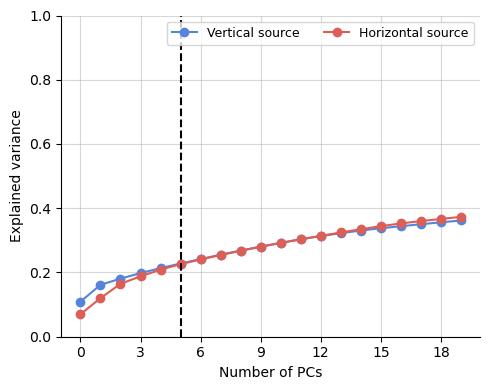

In [268]:

fig, ax = plt.subplots(1, 1, figsize = (5, 4))

ax.plot(np.cumsum(reducing_model_v_source.explained_variance_ratio_[:]), 'o-', label = 'Vertical source', c = '#5784db')
ax.plot(np.cumsum(reducing_model_h_source.explained_variance_ratio_[:]), 'o-', label = 'Horizontal source', c = '#db5f57')

ax.set_xlabel('Number of PCs')
ax.set_ylabel('Explained variance')
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend( fontsize = 9 , ncol = 2)
ax.vlines(5 , 0.,1.1, linestyle = '--', color = 'k')
#ax.set_xlim(0, 16)

ax.set_ylim(0., 1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_xlim([0, 15])
ax.grid(alpha = 0.5)

plt.tight_layout()

plt.savefig(savepath + 'explained_variance.pdf', dpi = 300, transparent=True)


In [22]:

from matplotlib.ticker import FormatStrFormatter


In [182]:
from sklearn.metrics import silhouette_samples, silhouette_score

nf = 20
nc = 20

threshold = 0.75
zz = np.zeros([nf, nc])
for i in range(2, nf, 1):

    NCOMPT = i
    features_v_s, variance_v_s, reducing_model_v_s, iv_v_s = Reduceing(mdl, scattering_coef_vs_norm, NCOMPT)

    for j in range(2, nc):

        linkage_v_s, clusters_v_s, colors_v_s = heir_cluster(features_v_s, threshold = threshold, CLUSTERS = j)

        zz[i,j] = silhouette_score(features_v_s, clusters_v_s)

    print(i)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


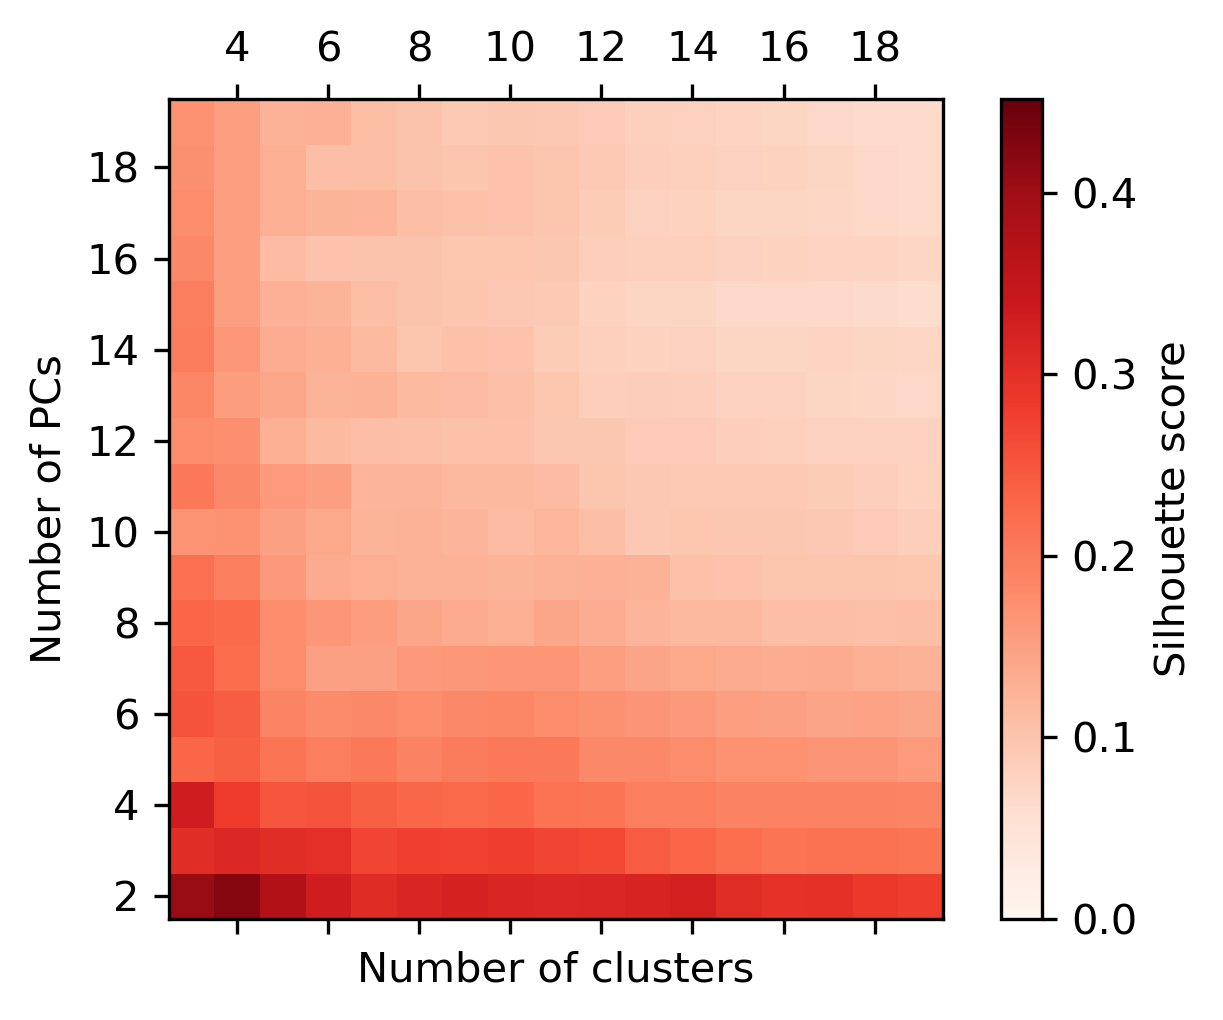

In [196]:
fig, ax = plt.subplots(1, figsize=(4.5, 3.5), dpi=300)

zz[ :2,:2 ] = 0
img = ax.matshow(np.abs(zz[:,:]), cmap="Reds")

ax.set_xlim(2.5, 19.5)
ax.set_ylim(1.5, 19.5)


plt.colorbar(img, label = 'Silhouette score')

ax.set_xlabel('Number of clusters')
ax.set_ylabel('Number of PCs')

plt.tight_layout()

plt.savefig(savepath + 'sillhooute.png', dpi = 300, transparent=True)



In [192]:
np.where(zz[:,:] == zz[2:,3:].max())


(array([2]), array([4]))

In [300]:

mdl = PCA

NCOMPT = 2

features_v_s, variance_v_s, reducing_model_v_s, iv_v_s = Reduceing(mdl, scattering_coef_vs_norm, NCOMPT)
features_h_s, variance_h_s, reducing_model_h_s, iv_h_s = Reduceing(mdl, scattering_coef_hs_norm, NCOMPT)


/tmp/ipykernel_94733/817928415.py:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


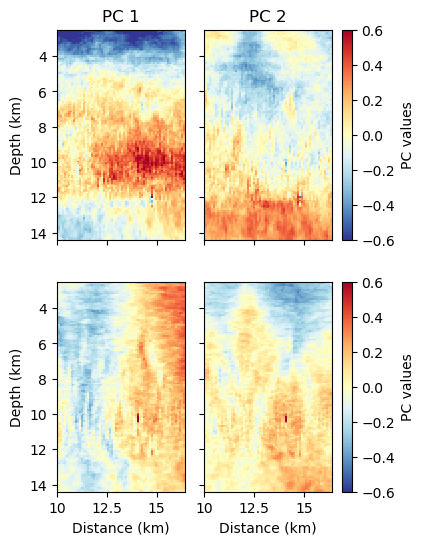

In [301]:
gs = {"hspace": 0.2, "wspace": 0.0}

fig, axs = plt.subplots(2, NCOMPT, figsize = (NCOMPT *1.9, 6), sharey =True, sharex = True,  gridspec_kw=gs)
axs = axs

vmax = 0.6
vmin = -vmax
CMAP = 'RdYlBu_r'


for ax, features_, title in zip( axs, [features_v_s, features_h_s], ['Vertical', 'Horizontal']):
    
    features_ = features_/features_.max()
    for i in range(NCOMPT):
        im1 = ax[i].pcolor(x_dist, y_dist, features_[:, i].reshape(120, 65), cmap = CMAP, vmin = vmin, vmax = vmax, )

        ax[i].set_ylim(y_dist.max(), y_dist.min())
        ax[i].set_xlim(x_dist.min(), x_dist.max())

        divider = make_axes_locatable(ax[i])

        cax1 = divider.append_axes('right', size='7.5%', pad=0.1, )
        cbar = fig.colorbar(im1, cax=cax1, orientation='vertical', pad=0.35, label = f'PC values')
        ax[i].xaxis.set_major_formatter(FormatStrFormatter('%g'))
        ax[i].yaxis.set_major_formatter(FormatStrFormatter('%g'))
        if i != axs.shape[-1]-1:
            cbar.ax.set_visible(False)

[axs[0][i].set_title(f"PC {i+1}") for i in range(NCOMPT)]
[axs[1][i].set_xlabel('Distance (km)') for i in range(NCOMPT)]
[ax[0].set_ylabel('Depth (km)') for ax in axs]
 
plt.tight_layout()

plt.savefig(savepath + 'PCA_components.png', dpi = 300, transparent=True)



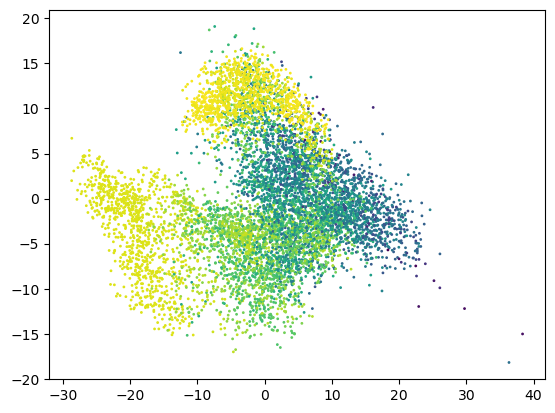

In [302]:

plt.scatter(features_v_s[:,0], features_v_s[:,1], c = vs, s = 1)


In [303]:


import seaborn as sns

cmap2 = sns.color_palette("hls", 7)

print(cmap2.as_hex())



['#db5f57', '#dbd057', '#75db57', '#57dbaa', '#579bdb', '#8557db', '#db57c0']


In [304]:
clusters_v_s

array([46, 46, 46, ...,  5, 10, 10], dtype=int32)

In [305]:
CLUSTERS = 50

threshold = 0.75

linkage_v_s, clusters_v_s, colors_v_s = heir_cluster(features_v_s, threshold = threshold, CLUSTERS = CLUSTERS)
#linkage_2, clusters_2, colors_2 = heir_cluster(features_avg, threshold = threshold, CLUSTERS = CLUSTERS)
#linkage_3, clusters_3, colors_3 = heir_cluster(features_all, threshold = threshold, CLUSTERS = CLUSTERS)

threshold = 0.64

linkage_h_s, clusters_h_s, colors_h_s = heir_cluster((features_h_s[:, :]), threshold = threshold, CLUSTERS = CLUSTERS)



Text(0, 0.5, 'Seismic cluster')

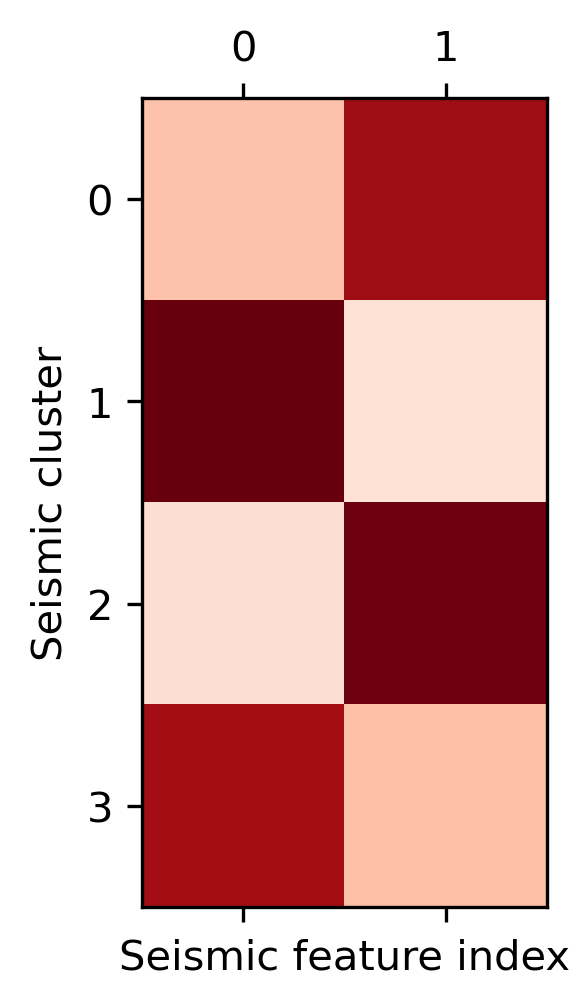

In [306]:

CLUSTERS = 4

threshold = 0.75

threshold = 0.6
features_main = features_v_s

linkage_4, clusters_4, colors_4 = heir_cluster((features_main[:, :]), threshold = threshold, CLUSTERS = CLUSTERS)



cluster_main = clusters_4

# Matrix of cluster centers
n_features = features_main.shape[1]

clusters_centers = np.zeros((CLUSTERS, n_features))

# Calculate centroids
for i in range(CLUSTERS):
    clusters_centers[i, :] = np.mean(features_main[np.where(cluster_main == i+1)[0]], 0)

clusters_centers /= np.abs(clusters_centers).sum(axis=1)[:, None]
isort = np.argsort(np.argmax(np.abs(clusters_centers), axis=0))
cluster_centers = clusters_centers[:, isort]

# Figure
fig, ax = plt.subplots(1, figsize=(4.5, 3.5), dpi=300)

# Plot
img = ax.matshow(np.abs(cluster_centers), cmap="Reds", vmin=0)
ax.set_xlabel("Seismic feature index")
ax.set_ylabel("Seismic cluster")




In [296]:
def hilbet(sig, smooth = 10, order = 1):

    envelope = abs(sp.signal.hilbert(sig))
    return sp.signal.savgol_filter(envelope, smooth, order)



In [297]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


def dendo2(link, CLUSTERS, ax, threshold = 0.3):

    with plt.rc_context({"lines.linewidth": 1}):
        
        return dendrogram(link ,
                CLUSTERS,
                orientation="top",
                truncate_mode="lastp",
                ax = ax,
                color_threshold = threshold,
                above_threshold_color="k",
                no_labels=True,
        )
    

0.025158427813330612


/tmp/ipykernel_94733/449344643.py:105: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(img, cax=axins1, orientation="horizontal" )
/tmp/ipykernel_94733/449344643.py:127: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im1, cax=axins1, orientation="horizontal", label ="Vs (km/s)")
/tmp/ipykernel_94733/449344643.py:105: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(img, cax=axins1, orientation="horizontal" )
/tmp/ipykernel_94733/449344643.py:127: MatplotlibDeprecationWarnin

0.007277207748140323
0.018566711381416457
0.03873395829173393


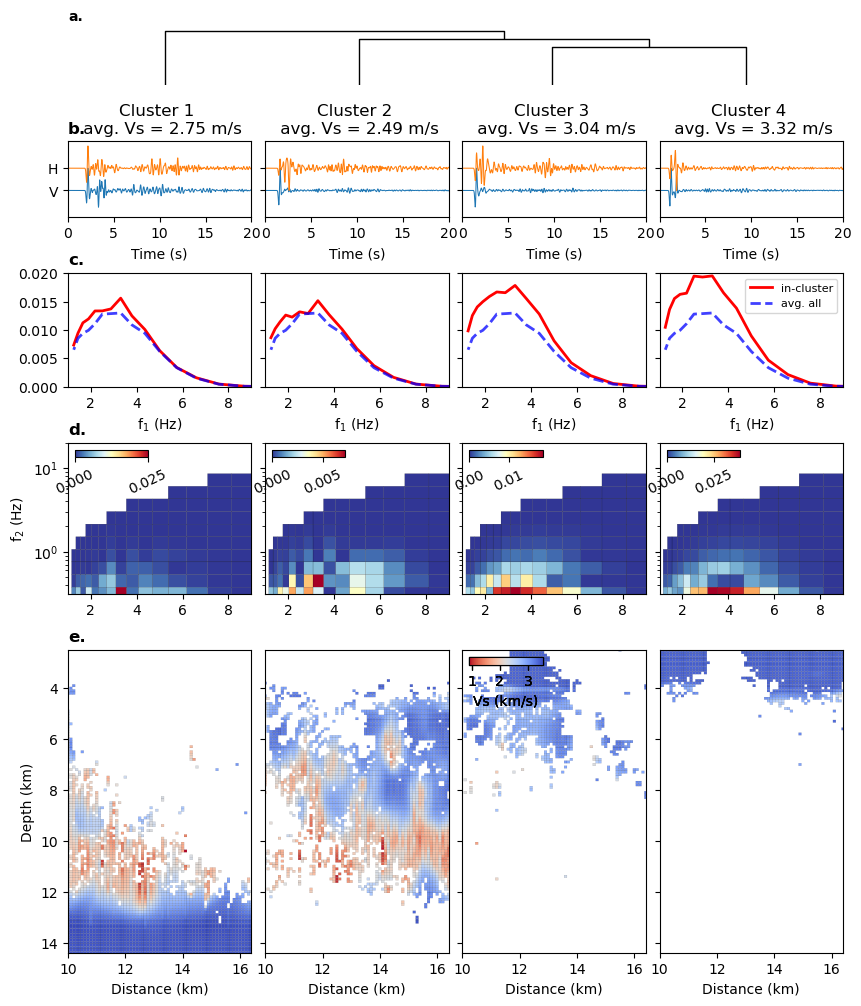

In [298]:


gs = {"hspace": 0.4, "wspace": 0.075, "height_ratios": [0.75,1,1.5, 2., 4]}
fig, axs = plt.subplots(
        5, CLUSTERS, figsize=(CLUSTERS * 2.5, 12), sharex="row", sharey="row", gridspec_kw=gs
    )

gs = axs[0, 0].get_gridspec()

# # remove the underlying Axes
for ax in axs[0, :]:
     ax.remove()

axbig = fig.add_subplot(gs[0, :])

sc = scattering_coeff_vs

r = dendo2(linkage_4, CLUSTERS, axbig, threshold = linkage_4[:, 2].max() * threshold)

axbig.set_axis_off()


for cluster_index in range(CLUSTERS):

    centroid = clusters_centers[cluster_index]
    in_cluster = np.where(cluster_main == cluster_index + 1)[0]
    features_in = features_main[in_cluster]
    distances = np.linalg.norm(features_in - centroid, axis=1, ord = 1)
    
    sorted = distances.argsort()
    sorted = in_cluster[sorted]

    selectedsource_coef1_mean = np.mean(sc[0][:,:,:], 1)
    selectedsource_coef2_mean =np.mean(sc[1][:,:,:], 1)

    selectedsource_coef1 = sc[0][: ,4 , :]
    selectedsource_coef2 = sc[1][: ,4 , :]
    

    coeff1 = selectedsource_coef1[sorted]
    coeff2 = selectedsource_coef2[sorted]


    ax = axs[1]
    ax[cluster_index].set_title(f"Cluster {cluster_index + 1} \n avg. Vs = " + str(np.round(np.mean(vs.reshape(-1)[sorted]), 2))+" m/s")
    for jj in range(2):
        dnorm = data_records_vs[sorted[0], 4+jj, :].T
        dnorm = dnorm / np.max(np.abs(dnorm))

        ax[cluster_index].plot(time_, dnorm + jj, lw = 0.75, alpha = 1)
    ax[cluster_index].set_ylim(-1.2, 2.2)
    #[ax[cluster_index].plot(time_, +0.01*i, lw = 0.75, alpha = 1, ) for i in range(ntrc)]

    #ax[cluster_index].set_yticklabels([0, 'V', 'H', 1])
    ax[cluster_index].set_yticks(np.arange(2), labels = ['V', 'H'])
    # ax[cluster_index].set_yticklabels(['H'])

    ax[cluster_index].set_xlabel('Time (s)')
    ax[cluster_index].set_xlim(0, 20)

    ax = axs[2]


    sss = np.mean(selectedsource_coef1_mean[...], 0)
    ss = abs(np.mean(coeff1 - sss, 0)) * 1

    #ss = np.mean(coeff1 - np.mean(sc[0][0], 0), 0)[0]
    
    ax[cluster_index].plot(network.banks[0].centers, sss+ss, lw = 2,  c = 'r', label = 'in-cluster')    
    ax[cluster_index].plot(network.banks[0].centers, (sss), lw = 2, alpha = 0.75, linestyle = '--', c = 'b', label = 'avg. all')
    #ax[cluster_index].plot(network.banks[0].centers, (ss), lw = 2, alpha = 0.75, linestyle = '--', c = 'k', label = 'avg. all')

    ax[cluster_index].set_xlim(1., 9)
    #ax[cluster_index].set_yscale('log')    
    ax[cluster_index].set_xlabel('f$_{1}$ (Hz)')

    ax = axs[3]

    #ss = abs(np.mean(np.mean(coeff2[:,...], 0), 0) - np.mean(np.mean(sc[1][:,4:6], axis = 0), 0) )

    sss = np.mean(selectedsource_coef2_mean[...], 0)
    ss = abs(np.mean(coeff2 - sss, 0))
    # ss = np.mean(np.mean(coeff2, 0), 0) - sc[1][0][0]

    #ss = np.log(ss)
    print(np.nanmax(ss))
    img = ax[cluster_index].pcolor(network.banks[0].centers, network.banks[1].centers,  ((ss.T)), vmin = 0,  cmap = 'RdYlBu_r', rasterized=True, edgecolors='k', linewidths=0.1 ) 

    ax[cluster_index].set_yscale("log")
    ax[1].set_xlim(network.banks[0].centers.min(), 10)
    ax[1].set_ylim(network.banks[1].centers.min(), 20)
    ax[cluster_index].set_xlim(1, 9)
    ax[0].set_ylabel('f$_{2}$ (Hz)')
    
    #ax[cluster_index].tick_params(axis="x", which="both", rotation=25)

 
    axins1 = inset_axes(
        ax[cluster_index],
        width="40%",  # width: 50% of parent_bbox width
        height="5%",  # height: 5%
        loc="upper left",
    )

    axins1.tick_params(axis="x", which="both", rotation = 25)
    axins1.xaxis.set_ticks_position("top")
    fig.colorbar(img, cax=axins1, orientation="horizontal" )


    ax = axs[4]
    vss = np.zeros_like(vs).reshape(-1)
    vss[:] = np.nan
    vss[in_cluster] = vs.reshape(-1)[in_cluster]
    #vss[in_cluster] = cluster_index

    im1 = ax[cluster_index].pcolor(x_dist, y_dist, vss.reshape(120, 65)[::1,], vmin = vs.min(), vmax = vs.max(), cmap = 'coolwarm_r', edgecolors='k', linewidths=0.05, rasterized = True)
        
    ax[cluster_index].set_ylim(y_dist.max(), y_dist.min())
    ax[cluster_index].set_xlim(x_dist.min(), x_dist.max())

    axins1 = inset_axes(
        ax[2],
        width="40%",  # width: 50% of parent_bbox width
        height="2.5%",  # height: 5%
        loc="upper left",
    )
    
    axins1.xaxis.set_ticks_position("top")
    fig.colorbar(im1, cax=axins1, orientation="horizontal", label ="Vs (km/s)")
    ax[cluster_index].set_xlabel('Distance (km)')
    ax[0].set_ylabel('Depth (km)')


titname = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
axbig.set_title(titname[0]+'.', loc = 'left', fontsize = 10, fontweight = 'bold')
for i in range(1,5):
    axs[i][0].set_title(titname[i]+'.', loc = 'left', fontsize = 12, fontweight = 'bold')

#axs[2][1].set_xlim(1, 6)

axs[2][-1].legend(fontsize = 8, loc = 'upper right')
axs[2][-1].set_ylim(0, 0.02)
fig.tight_layout()
fig.savefig(savepath + "clusters_centroid_with_dendrogram" + ".png", bbox_inches="tight", dpi=300, transparent=True,)



0.15666786087285847
0.25120387084310175
0.16052887351253486
0.1810057602877589


/tmp/ipykernel_94733/779325160.py:90: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(img, cax=axins1, orientation="horizontal" )
/tmp/ipykernel_94733/779325160.py:112: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(im1, cax=axins1, orientation="horizontal", label ="Vs (km/s)")
/tmp/ipykernel_94733/779325160.py:90: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  fig.colorbar(img, cax=axins1, orientation="horizontal" )
/tmp/ipykernel_94733/779325160.py:112: MatplotlibDeprecationWarning:

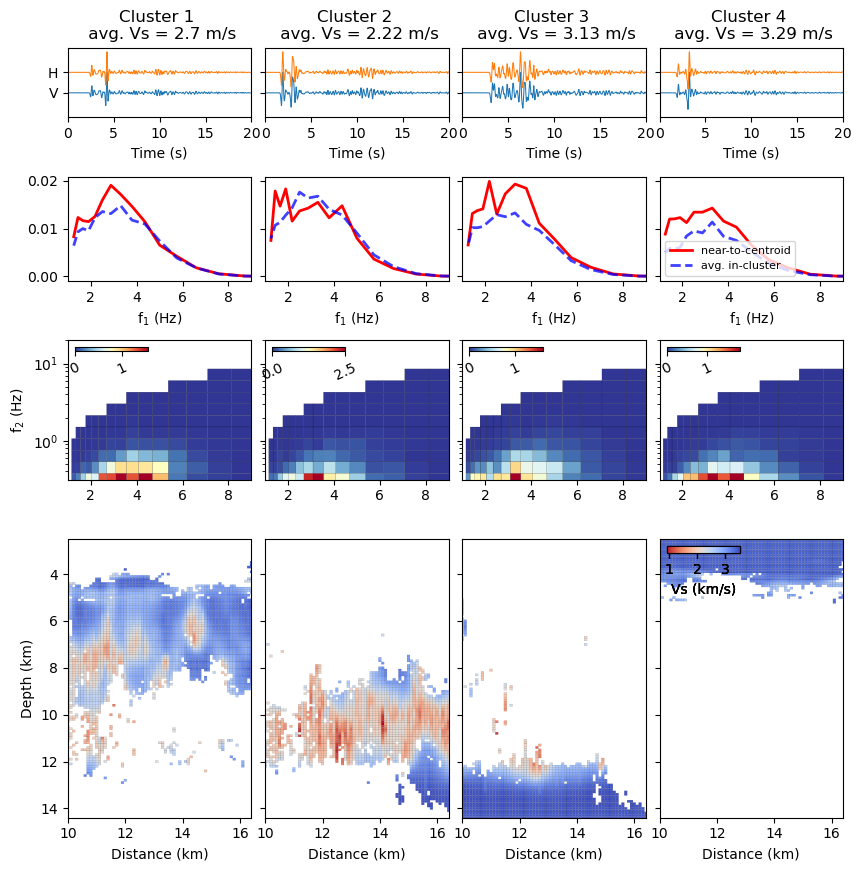

In [107]:

ntrc = 2
palette = sns.color_palette("flare", n_colors=ntrc)

sc = scattering_coeff_vs.copy()
indxtrc = 1


gs = {"hspace": 0.4, "wspace": 0.075, "height_ratios": [1,1.5, 2., 4]}
fig, axs = plt.subplots(
        4, CLUSTERS, figsize=(CLUSTERS * 2.5, 10), sharex="row", sharey="row", gridspec_kw=gs
    )
for cluster_index in range(CLUSTERS):

    centroid = clusters_centers[cluster_index]
    in_cluster = np.where(cluster_main == cluster_index + 1)[0]
    features_in = features_main[in_cluster]
    distances = np.linalg.norm(features_in - centroid, axis=1, ord = 1)
    
    sorted = distances.argsort()
    sorted = in_cluster[sorted]

    coeff1 = sc[0][sorted][3:4,4:6, :]
    coeff1_2 = sc[0][sorted][:,4:6, :]

    coeff2 = sc[1][sorted][3:4,4:6, ...]

    ax = axs[0]
    ax[cluster_index].set_title(f"Cluster {cluster_index + 1} \n avg. Vs = " + str(np.round(np.mean(vs.reshape(-1)[sorted]), 2))+" m/s")
    for jj in range(2):
        dnorm = data_records_vs[sorted[0], 4+i, :].T
        dnorm = dnorm / np.max(np.abs(dnorm))

        ax[cluster_index].plot(time_, dnorm + jj, lw = 0.75, alpha = 1)
    ax[cluster_index].set_ylim(-1.2, 2.2)
    #[ax[cluster_index].plot(time_, +0.01*i, lw = 0.75, alpha = 1, ) for i in range(ntrc)]

    #labels = [item.get_text() for item in ax[cluster_index].get_yticklabels()]
    #labels[1] = 'V'
    #labels[2] = 'H'

    #ax[cluster_index].set_yticklabels([0, 'V', 'H', 1])
    ax[cluster_index].set_yticks(np.arange(2), labels = ['V', 'H'])
    # ax[cluster_index].set_yticklabels(['H'])

    ax[cluster_index].set_xlabel('Time (s)')
    ax[cluster_index].set_xlim(0, 20)

    ax = axs[1]

    ss = abs(np.mean(np.mean((coeff1[:,...] - np.mean(np.mean(sc[0], 0), 0)), 0), 0))
    sss = (np.mean(np.mean(sc[0], 0), 0)) 
    sss2 = (np.mean(np.mean(coeff1_2, 0), 0)) 

    #ss = np.mean(coeff1 - np.mean(sc[0][0], 0), 0)[0]
    
    ax[cluster_index].plot(network.banks[0].centers, sss+(ss), lw = 2,  c = 'r', label = 'near-to-centroid')    
    ax[cluster_index].plot(network.banks[0].centers, (sss2), lw = 2, alpha = 0.75, linestyle = '--', c = 'b', label = 'avg. in-cluster')
    ax[cluster_index].set_xlim(1., 9)
    #ax[cluster_index].set_yscale('log')    
    ax[cluster_index].set_xlabel('f$_{1}$ (Hz)')

    ax = axs[2]

    ss = abs(np.mean(np.mean(coeff2[:,...], 0), 0)) # - np.median(np.median(sc[1], axis = 0), 0) )

    # ss = np.mean(np.mean(coeff2, 0), 0) - sc[1][0][0]

    #ss = np.log(ss)
    print(np.nanmax(ss))
    img = ax[cluster_index].pcolor(network.banks[0].centers, network.banks[1].centers, ((ss.T))*10, vmin = 0,  cmap = 'RdYlBu_r', rasterized=True, edgecolors='k', linewidths=0.1 ) 

    ax[cluster_index].set_yscale("log")
    ax[1].set_xlim(network.banks[0].centers.min(), 10)
    ax[1].set_ylim(network.banks[1].centers.min(), 20)
    ax[cluster_index].set_xlim(1, 9)
    ax[0].set_ylabel('f$_{2}$ (Hz)')
    
    #ax[cluster_index].tick_params(axis="x", which="both", rotation=25)

 
    axins1 = inset_axes(
        ax[cluster_index],
        width="40%",  # width: 50% of parent_bbox width
        height="2.5%",  # height: 5%
        loc="upper left",
    )

    axins1.tick_params(axis="x", which="both", rotation = 25)
    axins1.xaxis.set_ticks_position("top")
    fig.colorbar(img, cax=axins1, orientation="horizontal" )


    ax = axs[3]
    vss = np.zeros_like(vs).reshape(-1)
    vss[:] = np.nan
    vss[in_cluster] = vs.reshape(-1)[in_cluster]
    #vss[in_cluster] = cluster_index

    im1 = ax[cluster_index].pcolor(x_dist, y_dist, vss.reshape(120, 65)[::1,], vmin = vs.min(), vmax = vs.max(), cmap = 'coolwarm_r', edgecolors='k', linewidths=0.05, rasterized = True)
        
    ax[cluster_index].set_ylim(y_dist.max(), y_dist.min())
    ax[cluster_index].set_xlim(x_dist.min(), x_dist.max())

    axins1 = inset_axes(
        ax[3],
        width="40%",  # width: 50% of parent_bbox width
        height="2.5%",  # height: 5%
        loc="upper left",
    )
    
    axins1.xaxis.set_ticks_position("top")
    fig.colorbar(im1, cax=axins1, orientation="horizontal", label ="Vs (km/s)")
    ax[cluster_index].set_xlabel('Distance (km)')
    ax[0].set_ylabel('Depth (km)')
    
# titname = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
# for i in range(len(axs.reshape(-1))):
#     axs.reshape(-1)[i].set_title(titname[i]+'.', loc = 'left', fontsize = 10, fontweight = 'bold')

axs[1][-1].legend(fontsize = 8, loc = 'lower left')

fig.tight_layout()
fig.savefig(savepath + "clusters_centroid" + ".png", bbox_inches="tight", dpi=300, transparent=True,)



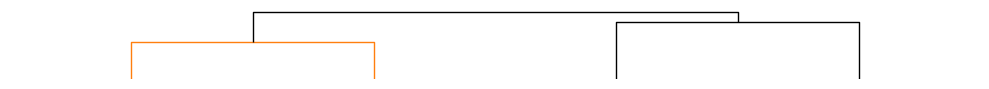

In [108]:


fig, ax = plt.subplots(1, figsize=(CLUSTERS * 2.5, 1))
threshold = 0.7
link = linkage_4

r = dendo2(link, CLUSTERS, ax, threshold = link[:, 2].max() * threshold)

#ax.set_ylim(0, link[:, 2].max() * 2)

ax.set_axis_off()
colors = np.unique(r['leaves_color_list'])

# for cl in np.unique(r['leaves_color_list']):

# indx = np.where(np.asarray(r['color_list']) == cl)[0]
# d = np.asarray(r['dcoord'])[indx][:, 3]
# coor = np.asarray(r['icoord'])[indx][np.where(d == np.max(d))[0][0], :]

# dd = np.asarray(r['dcoord'])
# ax.text(((coor[0]+coor[3])/2) - 20, -np.max(dd)*0.05,'Cluster '+ cl[1], rotation = 0)

#ax.text(440, 60,'Cluster 6', rotation = 90, c = colors[4])

fig.tight_layout()

fig.savefig(savepath + "dendrogram" + ".png", bbox_inches="tight", dpi=300, transparent=True,)



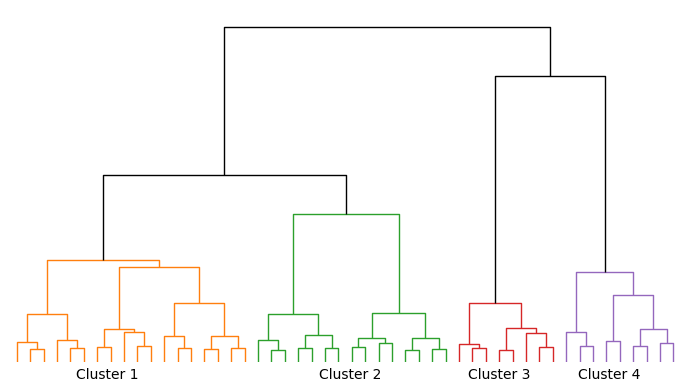

In [109]:


fig, ax = plt.subplots(1, figsize=(7, 4))
threshold = 0.67

link = linkage_4

r = dendo2(link, 50, ax, threshold = link[:, 2][-CLUSTERS+1])

ax.set_axis_off()

for cl in np.unique(r['leaves_color_list']):

    indx = np.where(np.asarray(r['color_list']) == cl)[0]
    d = np.asarray(r['dcoord'])[indx][:, 3]
    coor = np.asarray(r['icoord'])[indx][np.where(d == np.max(d))[0][0], :]
    dd = np.asarray(r['dcoord'])
    ax.text(((coor[0]+coor[3])/2) - 20, -np.max(dd)*0.05,'Cluster '+ cl[1], rotation = 0)


fig.tight_layout()
fig.savefig(savepath + "dendrogram" + ".png", bbox_inches="tight", dpi=300, transparent=True,)


